In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import glob
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# General Dataset
general_df = pd.read_csv(r'/content/drive/My Drive/Predictive Analysis of Crowdfunding Platforms/7.General Dataset (Final)/General Dataset Cleaned Final 1.csv')
general_df.head()

,name,description,country,currency,main_category,sub_category,time_before_launch,state_change_time,funding_time,goal_amount,goal_amount_usd,pledged_amount,pledged_amount_usd,no_of_backers,description_score,description_prediction,state
0,Ardmore Junction: A Feature Film,A film about chance meetings and changed lives.,1,1,1,100,7,30,30,23333.0,23333,23508.83,23509,256,1.554951,1,1
1,Support producing 3 Peace Day events in NYC,Milestone Broadcast is producing www.peaceday...,1,1,1,200,19,30,30,2000.0,2000,2249.00,2249,8,-0.143421,1,1
2,Mojobot - World's first tangible coding robot ...,Teaching kids computer science and robotics th...,10,6,4,300,20,30,30,78000.0,9949,151868.00,19370,59,0.232367,1,1
3,The World's Best Passport Case for Two | futar...,Share everything in life's journey with your p...,20,14,11,400,113,48,48,220000.0,2033,237609.00,2196,6,0.909679,1,1
4,"The Little Girl, The Ocean, and The Moon: A Ch...",This book is dedicated to your inner child. It...,1,1,5,500,673,43,43,20000.0,20000,26156.00,26156,463,9.094467,1,1


In [23]:
ans=[]
temp=[8,9,10,134,135,136]
for x in list(zip(list(general_df['description']),[len(sentence.split()) for sentence in list(general_df['description'])])):
  if x[1] in temp:
    temp.remove(x[1])
    ans.append(x)
ans  


[('A film about chance meetings and changed lives.', 8),
 ('Wylah: The Last Koorie Warrior - An illustrated chapter book.', 10),
 ('An illustrated Filipino folklore book for Dungeons & Dragons.', 9)]

In [ ]:
numerical=['time_before_launch','state_change_time','funding_time','goal_amount','goal_amount_usd','pledged_amount','pledged_amount_usd', 'no_of_backers', 'description_score']
categorical=['country','currency','main_category','sub_category']

General Dataset
1. Category wise projects
2. Category wise projects (successful and failed for each category)
3. Country wise projects
4. Duration wise distribution (successful and failure for each duration)
5. Projects in each category and amount pledged for each category
6. Projects in eacg category and backers for each category
7.Mean goal of successful vs failed projects category wise
8.Mean pledged amount of successful vs failed projects category wise

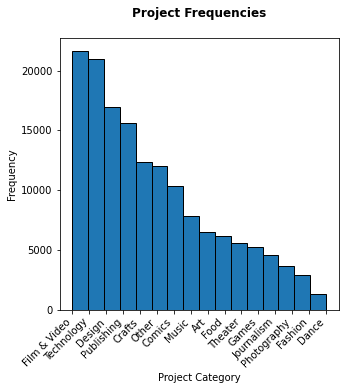

In [ ]:
# l={i:k for i,k in zip(range(1,17),['Film & Video', 'Technology', 'Design', 'Publishing', 'Crafts','Other', 'Comics', 'Music', 'Art', 'Food', 'Theater', 'Games','Journalism', 'Photography', 'Fashion', 'Dance'])}
# handle=range(1,17)
# legend=['Film & Video', 'Technology', 'Design', 'Publishing', 'Crafts','Other', 'Comics', 'Music', 'Art', 'Food', 'Theater', 'Games','Journalism', 'Photography', 'Fashion', 'Dance']
cat=('Film & Video', 'Technology', 'Design', 'Publishing', 'Crafts','Other', 'Comics', 'Music', 'Art', 'Food', 'Theater', 'Games','Journalism', 'Photography', 'Fashion', 'Dance')
plt.figure(figsize=(5,5))
general_df['main_category'].hist(bins=16,ec='black')
plt.grid(b=None)
plt.xlabel('Project Category')
plt.ylabel('Frequency')
plt.xticks(range(1,17),cat, rotation=45, ha='right')
# plt.legend(handle,legend,loc='upper right')
t=plt.title('Project Frequencies\n',
          fontweight ="bold")
#general_df['main_category'].value_counts()

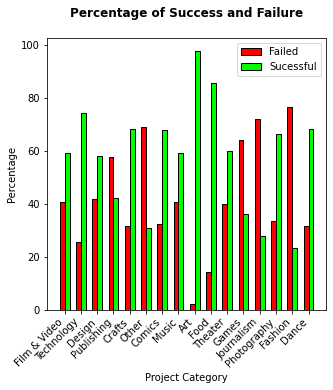

In [ ]:
f=general_df[general_df['state']==0]
s=general_df[general_df['state']==1]
cat=('Film & Video', 'Technology', 'Design', 'Publishing', 'Crafts','Other', 'Comics', 'Music', 'Art', 'Food', 'Theater', 'Games','Journalism', 'Photography', 'Fashion', 'Dance')
N = 16
total=general_df['main_category'].value_counts().to_dict() 
fail=f['main_category'].value_counts().to_dict()
success=s['main_category'].value_counts().to_dict()
red=[fail[i]/total[i]*100 for i in total.keys()]
green = [success[i]/total[i]*100 for i in total.keys()] 

ind = np.arange(N)

plt.figure(figsize=(5,5))
width = 0.3       

plt.bar(ind, red , width, label='Failed',color='r',ec='black')
plt.bar(ind + width, green, width, label='Sucessful',color='lime',ec='black')
plt.xlabel('Project Category')
plt.ylabel('Percentage')
plt.title('Percentage of Success and Failure\n', fontweight ="bold")

plt.xticks(ind + width / 2, cat, rotation=45, ha='right')
plt.legend(loc='best')
plt.show()

#f['main_category'].value_counts().to_dict()
# x=general_df['main_category']==1 
# y=general_df['state']==0
# tt=general_df[x&y]
# tt

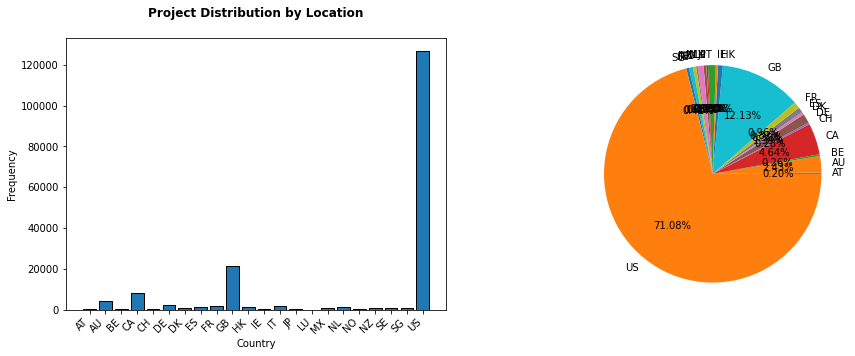

In [ ]:
cat={'AT': 355,'AU': 4340,'BE': 472,'CA': 8281,'CH': 492,'DE': 2487,'DK': 700,'ES': 1458,'FR': 1716,'GB': 21633,'HK': 1293,'IE': 572,'IT': 2043,'JP': 419,'LU': 46,'MX': 704,'NL': 1556,'NO': 411,'NZ': 833,'SE': 1043,'SG': 736,'US': 126780}
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
#plt.grid(b=None)
plt.bar(cat.keys(),cat.values(),ec='black')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.xticks(range(0,22),cat.keys(), rotation=45, ha='right')
t=plt.title('Project Distribution by Location\n',
          fontweight ="bold")
# #general_df['country'].value_counts()

country_projects = cat.values()
plt.subplot(1,2,2)
t=plt.pie(country_projects, labels = cat.keys(),autopct='%1.2f%%')

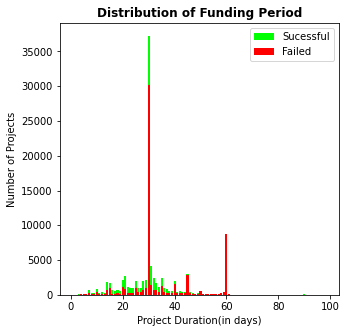

In [ ]:
#Duration wise distribution (successful and failure for each duration)
f=general_df[general_df['state']==0]
s=general_df[general_df['state']==1]
cat=('Film & Video', 'Technology', 'Design', 'Publishing', 'Crafts','Other', 'Comics', 'Music', 'Art', 'Food', 'Theater', 'Games','Journalism', 'Photography', 'Fashion', 'Dance')
N = 98
ind = np.arange(N)
plt.figure(figsize=(5,5))
       
plt.bar( list(s['funding_time'].value_counts().to_dict().keys()),list(s['funding_time'].value_counts().to_dict().values()), label='Sucessful',color='lime')
plt.bar( list(f['funding_time'].value_counts().to_dict().keys()),list(f['funding_time'].value_counts().to_dict().values()),label='Failed',color='r')
plt.xlabel('Project Duration(in days)')
plt.ylabel('Number of Projects')
plt.title('Distribution of Funding Period', fontweight='bold')

plt.legend(loc='best')
plt.show()


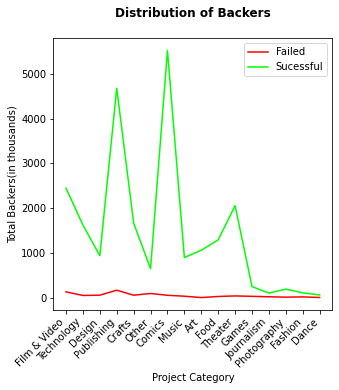

In [ ]:
# #6. Projects in each category and backers for each category
f=general_df[general_df['state']==0]
s=general_df[general_df['state']==1]
cat=('Film & Video', 'Technology', 'Design', 'Publishing', 'Crafts','Other', 'Comics', 'Music', 'Art', 'Food', 'Theater', 'Games','Journalism', 'Photography', 'Fashion', 'Dance')
N = 16
width=0.3
tt=f['main_category'].value_counts().to_dict()
gg=s['main_category'].value_counts().to_dict()
x={}
for i in tt.keys():
  x[i]=tt[i]+gg[i]
g=x.values()
red =  np.array(list(f.groupby('main_category').sum()['no_of_backers'].to_dict().values()))/1000
green = np.array(list(s.groupby('main_category').sum()['no_of_backers'].to_dict().values()))/1000

ind = np.arange(N)

plt.figure(figsize=(5,5))
#plt.bar(ind,g)       
plt.plot(ind, red,label='Failed',color='r')
plt.plot(ind, green, label='Sucessful',color='lime')
plt.xlabel('Project Category')
plt.ylabel('Total Backers(in thousands)')
plt.title('Distribution of Backers\n', fontweight='bold')

plt.xticks(ind, cat, rotation=45, ha='right')
plt.legend(loc='best')
plt.show()

#s.groupby('main_category').sum()['no_of_backers']

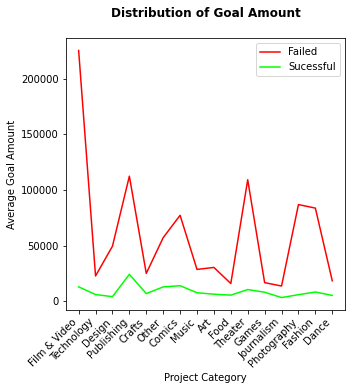

In [ ]:
f=general_df[general_df['state']==0]
s=general_df[general_df['state']==1]
cat=('Film & Video', 'Technology', 'Design', 'Publishing', 'Crafts','Other', 'Comics', 'Music', 'Art', 'Food', 'Theater', 'Games','Journalism', 'Photography', 'Fashion', 'Dance')
N = 16

red =  list(f.groupby('main_category').mean()['goal_amount_usd'].to_dict().values())
green = list(s.groupby('main_category').mean()['goal_amount_usd'].to_dict().values())

ind = np.arange(N)

plt.figure(figsize=(5,5))
       

plt.plot(ind, red,label='Failed',color='r')
plt.plot(ind, green, label='Sucessful',color='lime')
plt.xlabel('Project Category')
plt.ylabel('Average Goal Amount')
plt.title('Distribution of Goal Amount\n', fontweight='bold')

plt.xticks(ind , cat, rotation=45, ha='right')
plt.legend(loc='best')
plt.show()

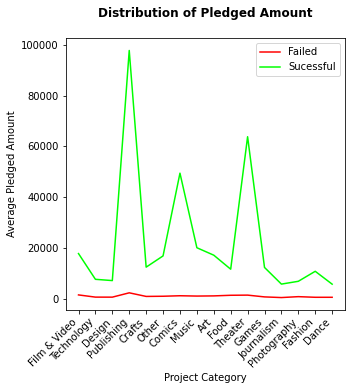

In [ ]:
f=general_df[general_df['state']==0]
s=general_df[general_df['state']==1]
cat=('Film & Video', 'Technology', 'Design', 'Publishing', 'Crafts','Other', 'Comics', 'Music', 'Art', 'Food', 'Theater', 'Games','Journalism', 'Photography', 'Fashion', 'Dance')
N = 16

red =  list(f.groupby('main_category').mean()['pledged_amount_usd'].to_dict().values())
green = list(s.groupby('main_category').mean()['pledged_amount_usd'].to_dict().values())

ind = np.arange(N)

plt.figure(figsize=(5,5))
       

plt.plot(ind, red,label='Failed',color='r')
plt.plot(ind, green, label='Sucessful',color='lime')
plt.xlabel('Project Category')
plt.ylabel('Average Pledged Amount')
plt.title('Distribution of Pledged Amount\n', fontweight='bold')

plt.xticks(ind , cat, rotation=45, ha='right')
plt.legend(loc='best')
plt.show()

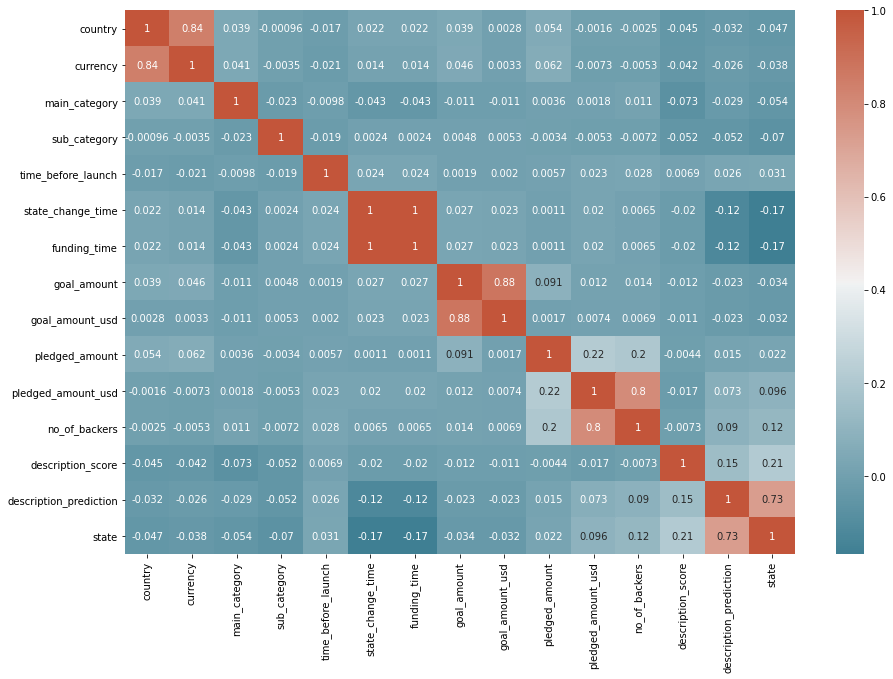

In [ ]:
corr = general_df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [ ]:
# Rewards Dataset
rewards_df = pd.read_csv(r'/content/drive/My Drive/Predictive Analysis of Crowdfunding Platforms/11.Rewards Dataset (Final)/Rewards Dataset Cleaned Final.csv')
rewards_df.head()

,main_category,sub_category,country,status,goal,pledged,backers,levels,reward_levels,updates,comments,duration,min_reward,max_reward,mean_reward,median_reward
0,1,1,10,1,10500,11545,66,7,"[25, 50, 100, 250, 500, 1000, 2500]",10,2,30,25,2500,632,250
1,7,2,10,0,4000,20,2,5,"[1, 5, 10, 25, 50]",6,0,47,1,50,18,10
2,1,3,10,1,6000,6535,100,13,"[1, 10, 25, 30, 50, 75, 85, 100, 110, 250, 500...",4,0,32,1,5000,557,85
3,10,4,10,0,3500,0,0,6,"[10, 25, 50, 100, 150, 250]",2,0,30,10,250,98,75
4,1,1,10,1,3500,3582,39,7,"[5, 25, 50, 100, 250, 500, 1000]",8,0,21,5,1000,276,100


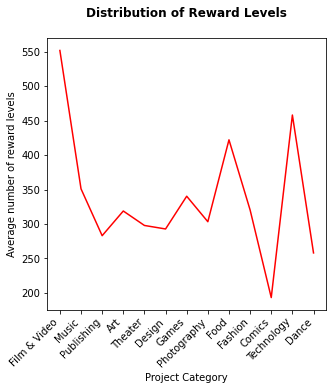

In [ ]:
#Category wise distribution of projects with avg number of reward levels
temp={'Film & Video': 1,'Music': 2,'Publishing': 3,'Art': 4,'Theater': 5,'Design': 6,'Games': 7,'Photography': 8,'Food': 9,'Fashion': 10,'Comics': 11,'Technology': 12,'Dance': 13}
cat={k:i for i,k in temp.items()}
N = 13
width=0.3
total=list(rewards_df['main_category'].value_counts().to_dict().values())
plt.figure(figsize=(5,5))    
plt.plot(list(cat.keys()),list(rewards_df.groupby('main_category').mean()['mean_reward']),color='r')

plt.xlabel('Project Category')
plt.ylabel('Average number of reward levels')
plt.title('Distribution of Reward Levels\n', fontweight='bold')

plt.xticks(list(cat.keys()),list(cat.values()), rotation=45, ha='right')

plt.show()
#rewards_df['main_category'].value_counts().to_dict(),cat


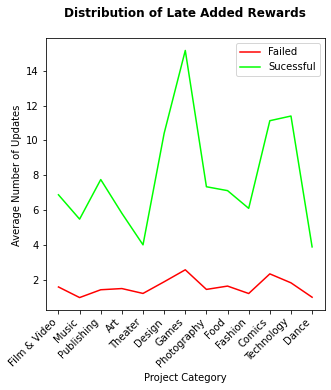

In [ ]:
#Split into successful and failed category wise and avg number of updates for each
f=rewards_df[rewards_df['status']==0]
s=rewards_df[rewards_df['status']==1]
temp={'Film & Video': 1,'Music': 2,'Publishing': 3,'Art': 4,'Theater': 5,'Design': 6,'Games': 7,'Photography': 8,'Food': 9,'Fashion': 10,'Comics': 11,'Technology': 12,'Dance': 13}
cat={k:i for i,k in temp.items()}
N = 13
width=0.3
red =  list(f.groupby('main_category').mean()['updates'].to_dict().values())
green = list(s.groupby('main_category').mean()['updates'].to_dict().values())

ind = range(1,N+1)

plt.figure(figsize=(5,5))
       

plt.plot(ind, red,label='Failed',color='r')
plt.plot(ind, green, label='Sucessful',color='lime')
plt.xlabel('Project Category')
plt.ylabel('Average Number of Updates ')
plt.title('Distribution of Late Added Rewards\n', fontweight='bold')

plt.xticks(list(cat.keys()),list(cat.values()), rotation=45, ha='right')
plt.legend(loc='best')
plt.show()

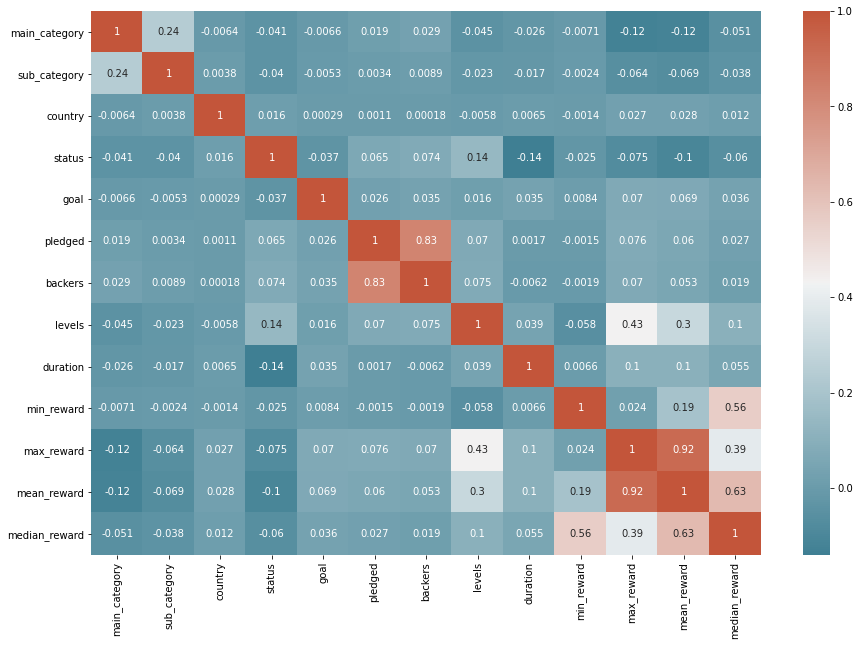

In [ ]:
corr = rewards_df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [ ]:
# Content Dataset
content_df = pd.read_csv(r'/content/drive/My Drive/Predictive Analysis of Crowdfunding Platforms/9.Content Dataset (Final)/Content Dataset Cleaned Final.csv')
content_df.head()

,Status,Currency,Main Category,Sub Category,Rewards,Goal,Pledged,Backers,Duration,Facebook Connected,Facebook Friends,Facebook Shares,Has Video,Has Website,Projects Created,Projects Backed,Videos,Images,Description Words,Risks and Challenges Words,FAQ
0,0,1,6,100,9,20000,6,2,30,1,272,70,1,0,1,0,0,2,297,153,0
1,0,1,1,200,8,3000,180,5,33,1,573,57,1,0,1,4,0,0,276,98,0
2,0,1,8,300,17,5000,1941,62,30,0,0,158,0,1,2,2,0,12,1049,66,2
3,0,1,3,400,4,5000,130,5,60,1,1285,2,1,1,1,2,0,0,309,169,0
4,0,1,3,500,12,12000,1015,16,30,1,969,411,1,1,1,0,0,6,1636,216,0


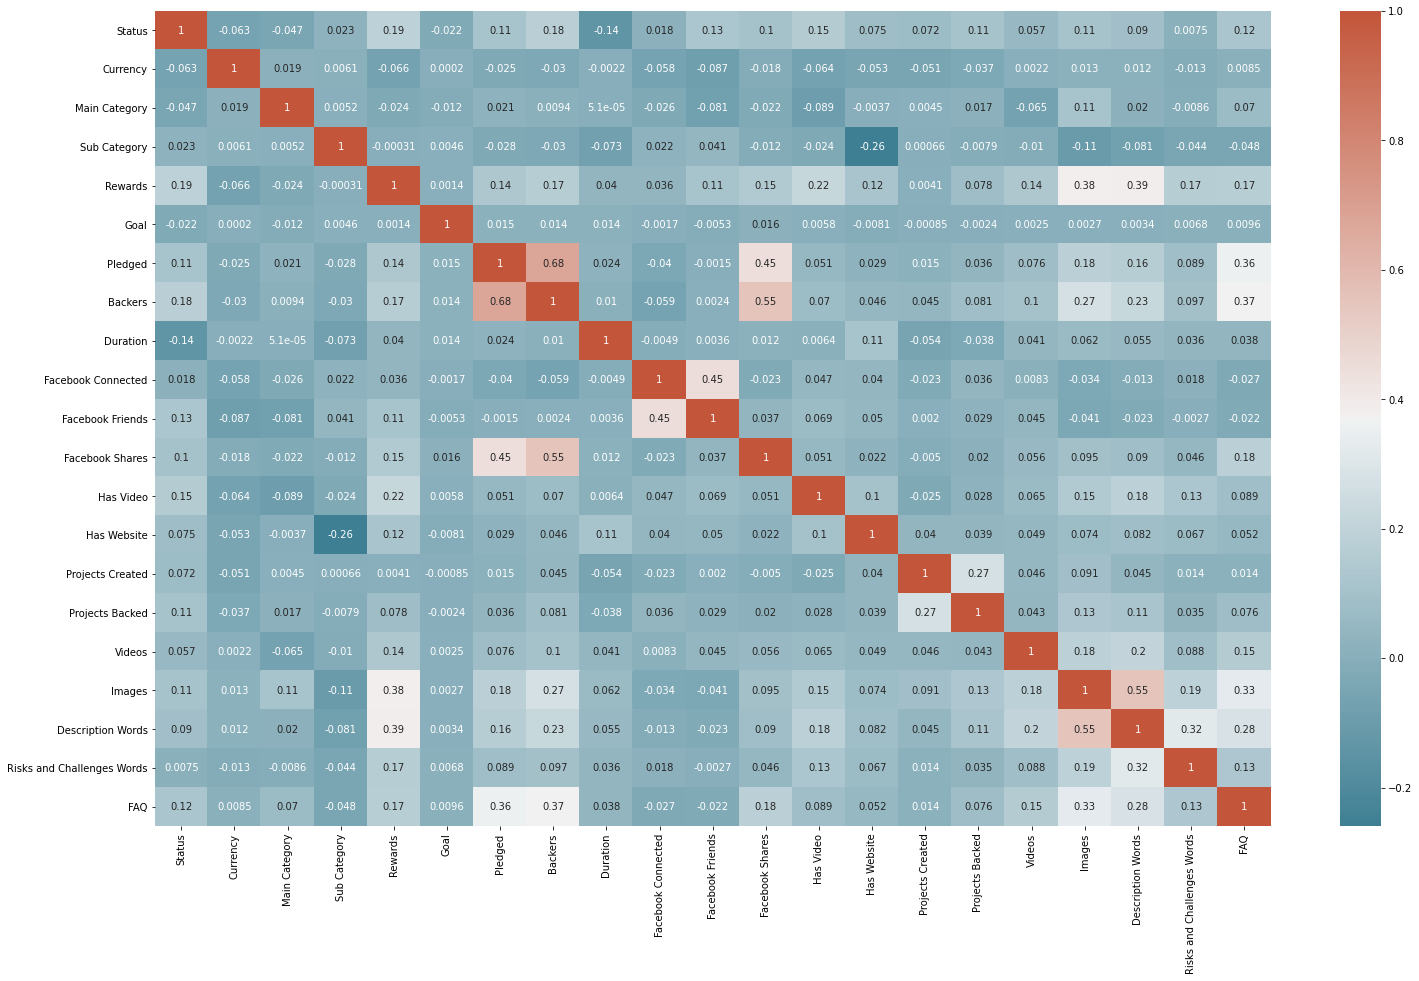

In [ ]:
corr = content_df.corr()
plt.subplots(figsize=(25,15))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))